# <font color='red'>-- Titanic accident demographics --</font>
#### Author: Fábio Marane

---
The following project analyses the data from the RMS Titanic accident. Then, with the cleanned and visualized data, a Supervised Machine Learning Model will be applied to predict the chance of survival for the missing values.

Source: https://www.kaggle.com/datasets/abhinand05/daily-sun-spot-data-1818-to-2019/code?select=sunspot_data.csv

---

### <font color='yellow'>Data cleaning and visualization</font>


- Initially, the data is imported from two separated CSV files. The source has alredy separated the train and test data.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data_train = pd.read_csv('titanic_train.csv')
data_test = pd.read_csv('titanic_test.csv')

print(data_train.head())
print(data_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [4]:
print(data_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


- With all the data combined, the "Name" column will be removed as it will not interfere with our study. Also, i'm checking for NaN values.

In [5]:
data_train.drop('Name', inplace = True, axis = 1)

In [6]:
null_values = data_train.isnull().sum()
print(f'Null values by column:\n{null_values}')

Null values by column:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- As the "Cabin" column has too many missing values, it will be discarded for not being proper for prediction. The NaN values in the "Age" column will be replaced by the mean of the ages, mantaining the data coherent. The mean of the ages is 29.881138, as shown before by the .describe() function.

- The null value in the "Fare" column will also be replaced by the mean value, and the "Embarked" with the mode value.

In [7]:
data_train.drop('Cabin', inplace = True, axis = 1)

data_train['Age'].fillna(data_train['Age'].mean(), inplace = True)
data_train['Fare'].fillna(data_train['Fare'].mean(), inplace = True)
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace = True)

null_values = data_train.isnull().sum()

print(f'Null values by column:\n{null_values}')

Null values by column:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


- With the cleanned data, i'll analyse if the proportions of the data with "Survived" values.

In [8]:
print(data_train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


There proportion of 0's to 1's is <mark>1.605</mark>.

- Before starting predictions, lets <color: yellow>visualize<color> the data given inittialy for training

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
ages_survivors = data_train[data_train['Survived'] == 1]['Age']
ages_deceased = data_train[data_train['Survived'] == 0]['Age']

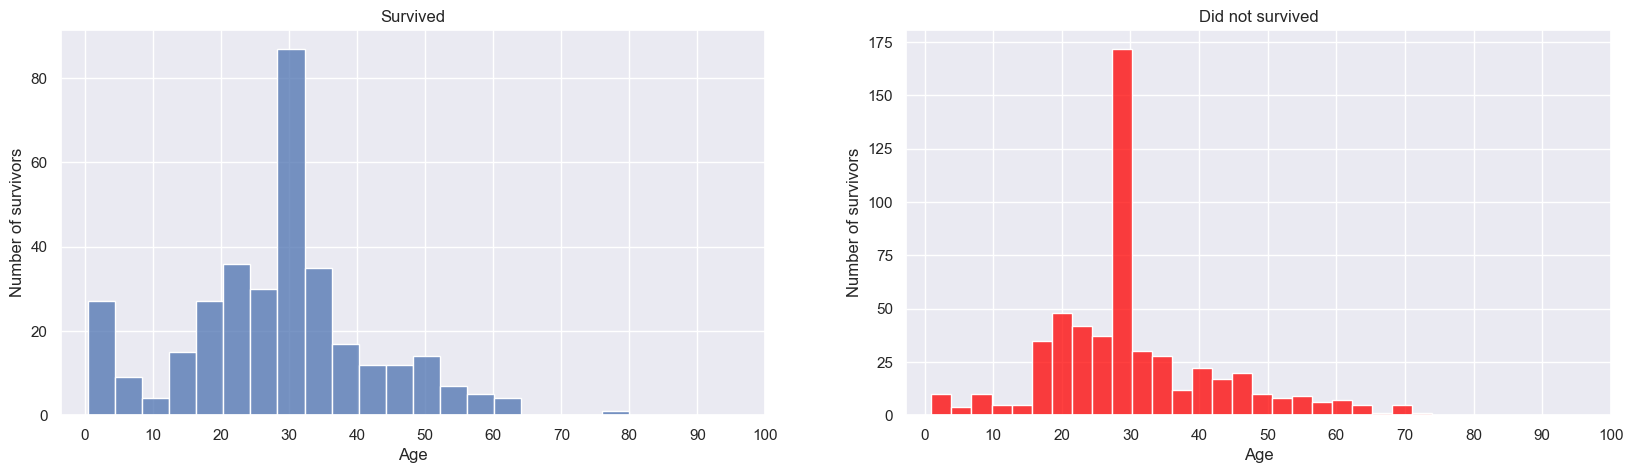

Mean value of the ages:
Survived: 28.549778121775027
Did not survived: 30.415099646415943


In [11]:
sns.set()
fig, axis = plt.subplots(1, 2, figsize = (20, 5))

sns.histplot(data = ages_survivors, ax = axis[0])
axis[0].set_title('Survived')
axis[0].set_ylabel('Number of survivors')
axis[0].set_xticks(np.arange(0, 110, 10))

sns.histplot(data = ages_deceased, ax = axis[1], color = 'red')
axis[1].set_title('Did not survived')
axis[1].set_ylabel('Number of survivors')
axis[1].set_xticks(np.arange(0, 110, 10))

plt.show()

print(f'Mean value of the ages:\nSurvived: {ages_survivors.mean()}\nDid not survived: {ages_deceased.mean()}')


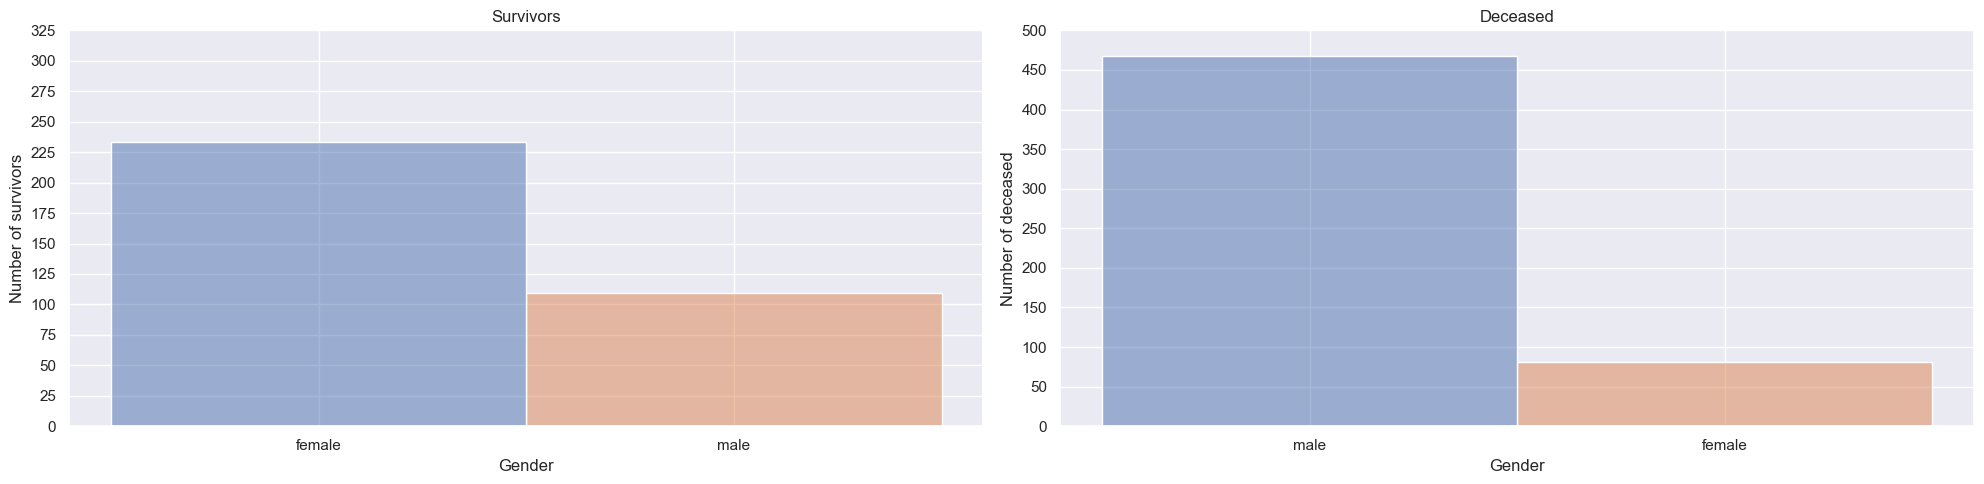

Percentage of the survivors
Male: 31.87%
Female: 68.13%


In [12]:
sns.set()
fig, axis = plt.subplots(1, 2, figsize = (20, 5))

sns.histplot(data = data_train[data_train['Survived'] == 1], x = 'Sex', hue = 'Sex', legend = False, ax = axis[0])
axis[0].set_title('Survivors')
axis[0].set_ylabel('Number of survivors')
axis[0].set_xlabel('Gender')
axis[0].set_yticks(np.arange(0, data_train[data_train['Survived'] == 1]['Survived'].count(), 25))

sns.histplot(data = data_train[data_train['Survived'] == 0], x = 'Sex', hue = 'Sex', legend = False, ax = axis[1])
axis[1].set_title('Deceased')
axis[1].set_ylabel('Number of deceased')
axis[1].set_xlabel('Gender')
axis[1].set_yticks(np.arange(0, data_train[data_train['Survived'] == 0]['Survived'].count(), 50))

plt.tight_layout()
plt.show()

male_survivors = data_train[(data_train['Survived'] == 1) & (data_train['Sex'] == 'male')]['Survived'].count()
female_survivors = data_train[(data_train['Survived'] == 1) & (data_train['Sex'] == 'female')]['Survived'].count()
number_survivors = data_train[data_train['Survived'] == 1]['Survived'].count()

percentage_male_survivors = (male_survivors/number_survivors)*100
percentage_female_survivors = 100 - percentage_male_survivors

print('Percentage of the survivors')
print('Male: {:.2f}%'.format(percentage_male_survivors))
print('Female: {:.2f}%'.format(percentage_female_survivors))

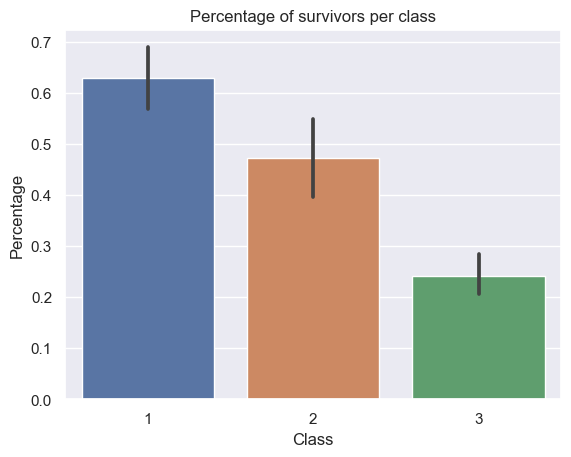

Percentage of the survivors
First class: 62.96%  -  (136 survivors)
Second class: 47.28%  -  (87 survivors)
Third class: 24.24%  -  (119 survivors)


In [13]:
sns.set()

sns.barplot(data = data_train, x = 'Pclass', y = 'Survived')
plt.title('Percentage of survivors per class')
plt.xlabel('Class')
plt.ylabel('Percentage')

plt.show()

class1_survivors = data_train[(data_train['Survived'] == 1) & (data_train['Pclass'] == 1)]['Survived'].count()
class2_survivors = data_train[(data_train['Survived'] == 1) & (data_train['Pclass'] == 2)]['Survived'].count()
class3_survivors = data_train[(data_train['Survived'] == 1) & (data_train['Pclass'] == 3)]['Survived'].count()

percentage_class1_survivors = (class1_survivors/len(data_train[data_train['Pclass'] == 1]))*100
percentage_class2_survivors = (class2_survivors/len(data_train[data_train['Pclass'] == 2]))*100
percentage_class3_survivors = (class3_survivors/len(data_train[data_train['Pclass'] == 3]))*100



print('Percentage of the survivors')
print('First class: {:.2f}%  -  ({} survivors)'.format(percentage_class1_survivors, class1_survivors))
print('Second class: {:.2f}%  -  ({} survivors)'.format(percentage_class2_survivors, class2_survivors))
print('Third class: {:.2f}%  -  ({} survivors)'.format(percentage_class3_survivors, class3_survivors))


### <font color='yellow'>Supervised Machine Learning Modelling with SKLearn</font>


- Foremost, the "Sex" column will be altered to binary values: Male = 1, Female = 0.

In [14]:
gender = {
    'male' : 1,
    'female' : 0
}
data_train['Sex'] = data_train['Sex'].replace(gender)

C:\Users\fabio\AppData\Local\Temp\ipykernel_10824\2182377405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(), cmap = 'crest', annot = True)


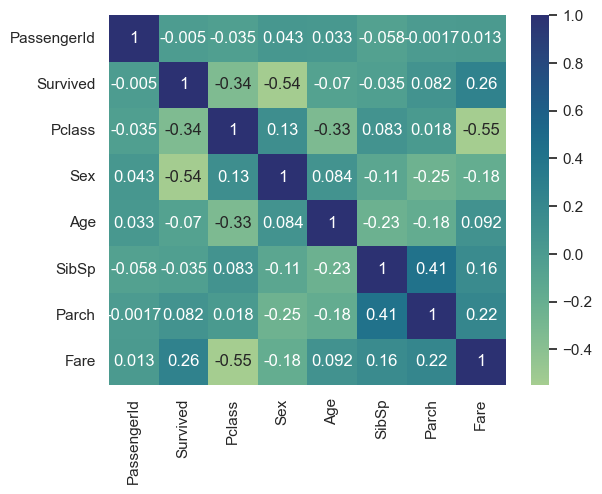

In [15]:
sns.heatmap(data_train.corr(), cmap = 'crest', annot = True)
plt.show()

There's a substantial correlation between <mark>survival, gender and class</mark>, which was visuallly perceived in data analysis. There is also a considerable correlation with the paid fares, which are of course coherent to the passanger classes. We can do a 2D analysis with gender and class:

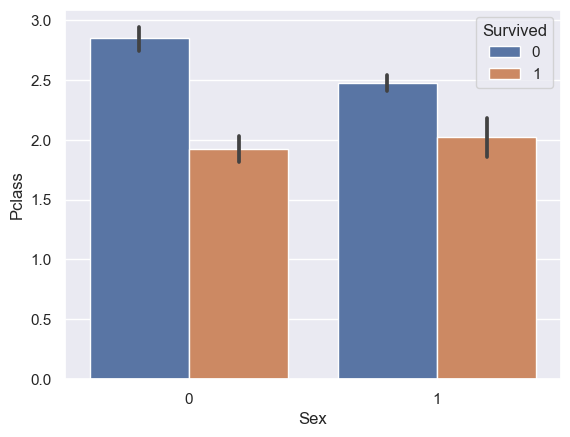

In [20]:
sns.barplot(x = data_train['Sex'], y = data_train['Pclass'], hue = data_train['Survived'])
plt.show()